In [2]:
%matplotlib inline
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=np.load('mnist_minmax.npz')

In [4]:
X_x = data['entrenamiento']
X_c = data['entrenamiento_clases']

Y_x = data['validacion']
Y_c = data['validacion_clases']

Z_x = data['testeo']
Z_c = data['testeo_clases']

In [5]:
imagenes = np.concatenate((X_x, Y_x, Z_x), axis=0)
labels = np.concatenate((X_c, Y_c, Z_c), axis=0)


In [6]:
imagenes_muestra=np.zeros((10,784))

indice = 0; contador = 0
while contador != 10:
    if labels[indice]==contador:
        imagenes_muestra[contador] = imagenes[indice]
        contador+=1
    indice+=1


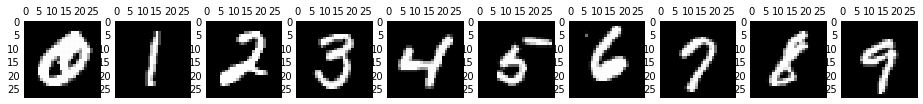

In [7]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,10):
    ax = fig.add_subplot(1,10,i+1)
    ax.matshow(imagenes_muestra[i].reshape((28,28)).astype(float), cmap='gray', interpolation='nearest')
plt.show()

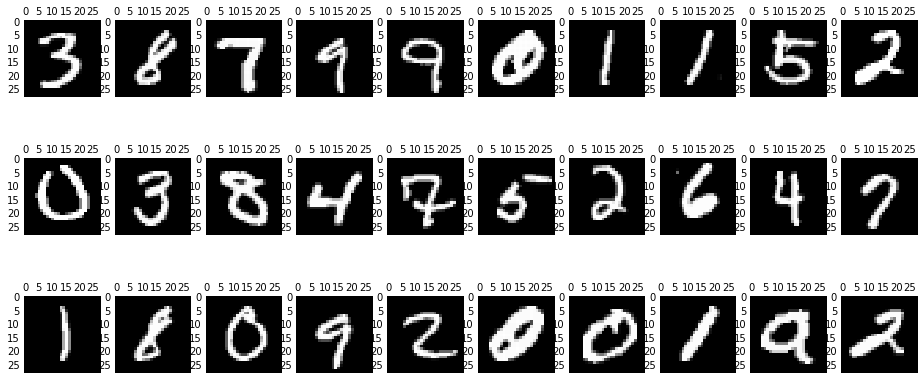

In [8]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1)
    ax.matshow(imagenes[i].reshape((28,28)).astype(float))
plt.show()

In [9]:
means = {i: [] for i in range(10)}
for i in range(10):
    #mask = labels == i
    #means[i] = imagenes[mask]
    means[i] = np.mean(imagenes[labels == i], axis=0)

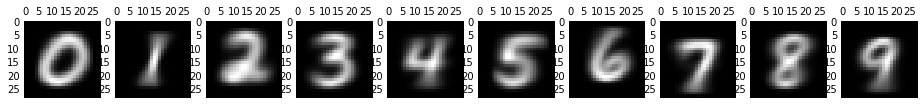

In [10]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,10):
    ax = fig.add_subplot(1,10,i+1)
    ax.matshow(means[i].reshape((28,28)).astype(float), cmap='gray', interpolation='nearest')
plt.show()

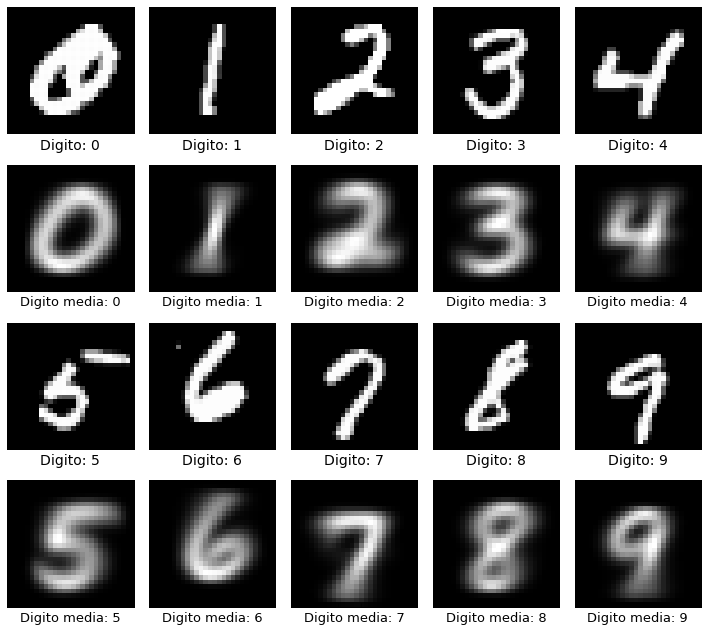

In [28]:
plt.gray()
fig = plt.figure( figsize=(10,9) )
for i in range(0,20):
    ax = fig.add_subplot(4,5,i+1)
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    if i >= 0 and i < 5:
        ax.matshow(imagenes_muestra[i].reshape((28,28)).astype(float))
        ax.set_xlabel("Digito: " + str(i), fontsize=14)
    elif i >= 5 and i < 10:
        ax.matshow(means[i-5].reshape((28,28)).astype(float))
        ax.set_xlabel("Digito media: " + str((i-5)), fontsize=13)
    elif i >= 10 and i < 15:
        ax.matshow(imagenes_muestra[i-5].reshape((28,28)).astype(float))
        ax.set_xlabel("Digito: " + str((i-5)), fontsize=14)
    elif i >= 15 and i < 20:
        ax.matshow(means[i-10].reshape((28,28)).astype(float))
        ax.set_xlabel("Digito media: " + str((i-10)), fontsize=13)

fig.tight_layout()
plt.savefig('Mnist_medias.pdf', bbox_inches='tight', dpi=300)
plt.savefig('Mnist_medias.png', bbox_inches='tight', dpi=300)
plt.show()